In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import math
import cv2

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
train_generator=train_datagen.flow_from_directory(
    directory=r"C:\Users\ACER\Desktop\CNN DATASETS\After split(GM)\TRAIN",
    target_size=(150,150),
    batch_size=16,
    class_mode='binary'
)

validation_generator=val_datagen.flow_from_directory(
    directory=r"C:\Users\ACER\Desktop\CNN DATASETS\After split(GM)\TEST",
    target_size=(150,150),
    batch_size=16,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [4]:
tf.get_logger().setLevel('ERROR')

In [5]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(150,150,3)),             
    layers.RandomRotation(0.2),                 
    layers.RandomZoom(0.1),                     
    layers.RandomContrast(0.1),                  
    layers.RandomBrightness(factor=0.1),         
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1) 
])

In [6]:
model = tf.keras.Sequential([
    data_augmentation,
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
    
])


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 128)     

In [9]:
steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=12,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/12
1411/1411 [==============================] - 686s 486ms/step - loss: 0.6762 - accuracy: 0.5629 - val_loss: 0.5606 - val_accuracy: 0.7875
Epoch 2/12
1411/1411 [==============================] - 673s 477ms/step - loss: 0.6741 - accuracy: 0.5680 - val_loss: 0.6911 - val_accuracy: 0.6001
Epoch 3/12
1411/1411 [==============================] - 666s 472ms/step - loss: 0.6784 - accuracy: 0.5624 - val_loss: 0.4875 - val_accuracy: 0.8376
Epoch 4/12
1411/1411 [==============================] - 666s 472ms/step - loss: 0.6864 - accuracy: 0.5512 - val_loss: 0.7790 - val_accuracy: 0.6590
Epoch 5/12
1411/1411 [==============================] - 672s 476ms/step - loss: 0.6776 - accuracy: 0.5606 - val_loss: 0.5448 - val_accuracy: 0.6733
Epoch 6/12
1411/1411 [==============================] - 671s 475ms/step - loss: 0.6163 - accuracy: 0.6418 - val_loss: 0.4939 - val_accuracy: 0.8098


In [13]:
model = load_model('best_model.h5')

early_stop2 = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Continue training with more epochs
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=6,          # can increase to more epochs
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stop2, checkpoint]
)

Epoch 1/6
1411/1411 [==============================] - 676s 473ms/step - loss: 0.6846 - accuracy: 0.5528 - val_loss: 0.6747 - val_accuracy: 0.7807
Epoch 2/6
1411/1411 [==============================] - 665s 472ms/step - loss: 0.6716 - accuracy: 0.5676 - val_loss: 0.7887 - val_accuracy: 0.5933
Epoch 3/6
1411/1411 [==============================] - 664s 471ms/step - loss: 0.6177 - accuracy: 0.6383 - val_loss: 0.7140 - val_accuracy: 0.7680
Epoch 4/6
1411/1411 [==============================] - 666s 472ms/step - loss: 0.6079 - accuracy: 0.6466 - val_loss: 0.7628 - val_accuracy: 0.6840
Epoch 5/6
1411/1411 [==============================] - 667s 473ms/step - loss: 0.6074 - accuracy: 0.6394 - val_loss: 0.5038 - val_accuracy: 0.8345
Epoch 6/6
1411/1411 [==============================] - 667s 472ms/step - loss: 0.6025 - accuracy: 0.6482 - val_loss: 0.4913 - val_accuracy: 0.8217


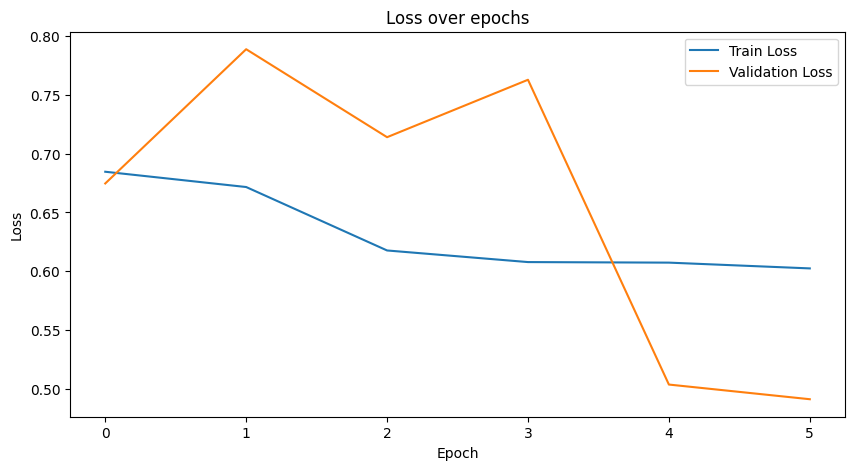

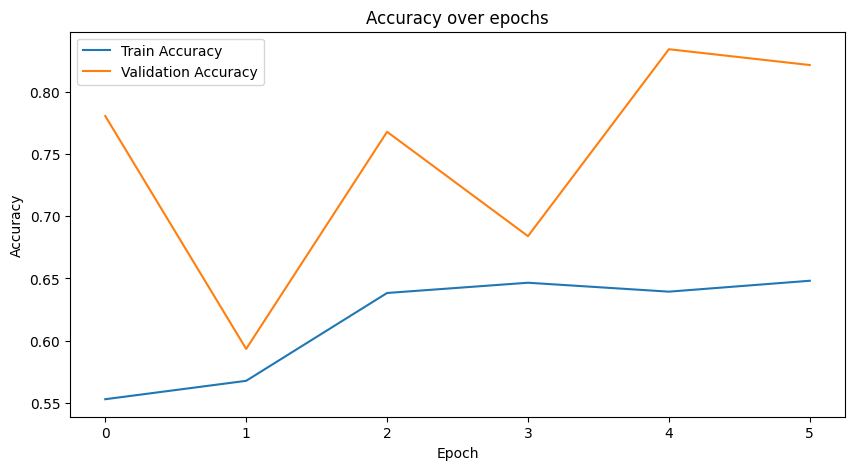

In [16]:
# Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [31]:
img_path = r"C:\Users\ACER\Desktop\images (3).jpg"

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print(f"{prediction[0][0]},Recycle")
else:
   print(f"{prediction[0][0]},Organic")

1/1 [==============================] - 0s 41ms/step
0.9999998807907104,Recycle


In [21]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.output_shape)



0 sequential (None, 150, 150, 3)
1 conv2d (None, 148, 148, 64)
2 batch_normalization (None, 148, 148, 64)
3 max_pooling2d (None, 74, 74, 64)
4 conv2d_1 (None, 72, 72, 128)
5 batch_normalization_1 (None, 72, 72, 128)
6 max_pooling2d_1 (None, 36, 36, 128)
7 conv2d_2 (None, 34, 34, 256)
8 batch_normalization_2 (None, 34, 34, 256)
9 max_pooling2d_2 (None, 17, 17, 256)
10 global_average_pooling2d (None, 256)
11 dense (None, 128)
12 batch_normalization_3 (None, 128)
13 dropout (None, 128)
14 dense_1 (None, 1)


In [23]:
last_conv_layer_name = 'conv2d_2'  

last_conv_layer = model.get_layer(last_conv_layer_name)

grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, 0]

grads = tape.gradient(loss, conv_outputs)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

heatmap = np.maximum(heatmap, 0)
heatmap /= tf.reduce_max(heatmap)
heatmap = heatmap.numpy()


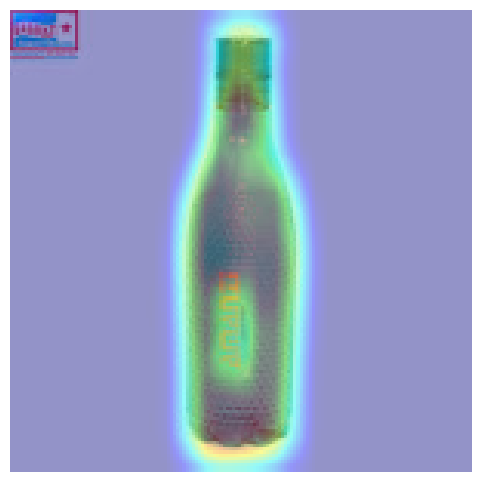

In [24]:
img_cv = cv2.imread(img_path)
img_cv = cv2.resize(img_cv, (150, 150))

heatmap = cv2.resize(heatmap, (img_cv.shape[1], img_cv.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose heatmap on original image
superimposed_img = cv2.addWeighted(img_cv, 0.6, heatmap, 0.4, 0)

# Show the image
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [1]:
import os

print("Current working directory:")
print(os.getcwd())

print("\nFiles in this directory:")
print(os.listdir())


Current working directory:
C:\Users\ACER\REAL PROJECTS\CNN\Garbage Management

Files in this directory:
['.ipynb_checkpoints', 'best_model.h5', 'Main.ipynb', 'Split.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb']


In [4]:
train_generator.class_indices


{'O': 0, 'R': 1}